# Trading Strategies: MACD
In this notebook, we'll explore the Moving Average Convergence Divergence (MACD) indicator, a popular tool used in technical analysis to spot trends and reversals in stock prices. Using Python, we will apply the MACD strategy to a stock, visualize buy and sell signals, and backtest the strategy to assess its effectiveness. We will also visualize the trades made based on this strategy, helping you understand how to optimize your trading approach.

## Import Libraries

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate

## Stock Data Selection
In this step, we will define the stock symbol and date range for our analysis. In this example, we are using TSLA (Tesla) as the stock symbol, but you can change this to any stock you are interested in. We will also fetch the stock data using the yfinance library.

### Select Stock and Date Range

In [37]:
# Define the stock symbol and the date range for our data
stock_symbol = 'TSLA'
start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Sets end date to today's date
print(f"MACD Trading for: {stock_symbol}\nStart Date: {start_date}\nEnd Date: {end_date}")

MACD Trading for: TSLA
Start Date: 2024-01-01
End Date: 2024-11-30


### Download Data

In [38]:
df = yf.download(stock_symbol, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600


### Prepare Data

In [39]:
# Select the desired columns (first level of MultiIndex)
df.columns = df.columns.get_level_values(0)

# Keep only the columns you are interested in
df = df[['Open', 'Close', 'Volume', 'Low', 'High']]

# If the index already contains the dates, rename the index
df.index.name = 'Date'  # Ensure the index is named "Date"
    
# Resetting the index if necessary
df.reset_index(inplace=True)

# Ensure that the index is of type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index again (in case it's reset)
df.set_index('Date', inplace=True)

df.head()

Price,Open,Close,Volume,Low,High
Date,,,,,
2024-01-02,250.080002,248.419998,104654200,244.410004,251.250000
2024-01-03,244.979996,238.449997,121082600,236.320007,245.679993
2024-01-04,239.250000,237.929993,102629300,237.729996,242.699997
2024-01-05,236.860001,237.490005,92379400,234.899994,240.119995
2024-01-08,236.139999,240.449997,85166600,235.300003,241.250000


### Plot Closing Price

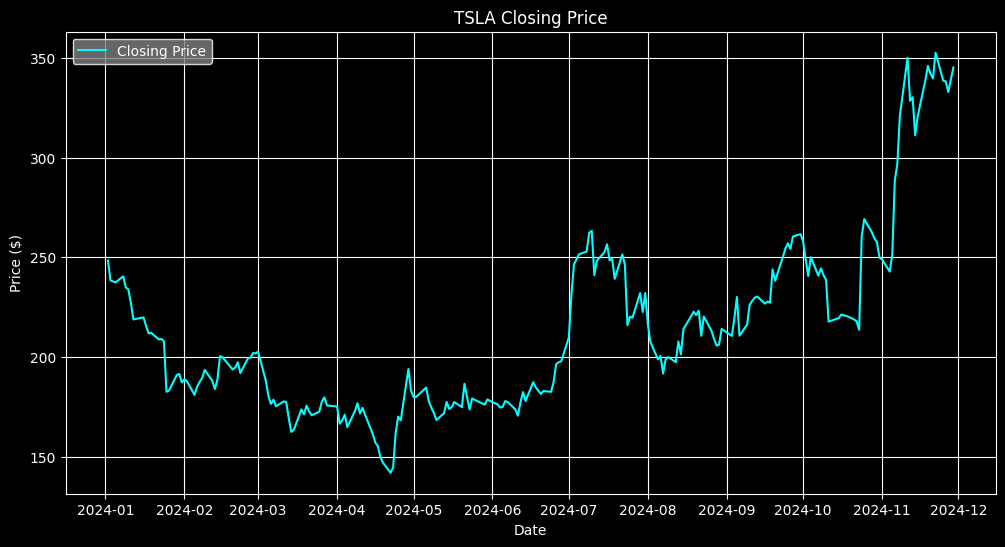

In [52]:
# Set dark mode for the plot
plt.style.use('dark_background')  # Use dark background style

# Plot the closing price
plt.figure(figsize=(12, 6))

plt.plot(df['Close'], label='Closing Price', color='cyan')  # Change color for visibility

# Add title, labels, and legend with appropriate colors for dark mode
plt.title(f'{stock_symbol} Closing Price', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Price ($)', color='white')
plt.legend(facecolor='gray', edgecolor='white', labelcolor='white')
plt.grid()

# Save the plot in 300dpi
plt.savefig(f'{stock_symbol}_stock_chart_darkmode.png', dpi=300)

# Show the plot
plt.show()


## Backtest The Strategy

### Generate MACD Signals
Here, we calculate the MACD (Moving Average Convergence Divergence) and the Signal Line, and use them to generate buy and sell signals based on crossovers. The strategy is as follows:

* Buy when the MACD crosses above the Signal Line.
* Sell when the MACD crosses below the Signal Line.

In [41]:
# Calculate MACD and Signal Line
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Generate Buy (1) and Sell (-1) Signals
df['Signal'] = 0
df.loc[df['MACD'] > df['Signal_Line'], 'Signal'] = 1  # Buy signal
df.loc[df['MACD'] < df['Signal_Line'], 'Signal'] = -1  # Sell signal

# Calculate Position
df['Position'] = df['Signal'].shift()  # Avoid lookahead bias
df.head()


Price,Open,Close,Volume,Low,High,EMA_12,EMA_26,MACD,Signal_Line,Signal,Position
Date,,,,,,,,,,,
2024-01-02,250.080002,248.419998,104654200,244.410004,251.250000,248.419998,248.419998,0.000000,0.000000,0,NaN
2024-01-03,244.979996,238.449997,121082600,236.320007,245.679993,246.886152,247.681480,-0.795328,-0.159066,-1,0.0
2024-01-04,239.250000,237.929993,102629300,237.729996,242.699997,245.508281,246.959147,-1.450866,-0.417426,-1,-1.0
2024-01-05,236.860001,237.490005,92379400,234.899994,240.119995,244.274700,246.257729,-1.983029,-0.730546,-1,-1.0
2024-01-08,236.139999,240.449997,85166600,235.300003,241.250000,243.686284,245.827527,-2.141242,-1.012686,-1,-1.0


### Plot MACD, Signal Line, and Histogram

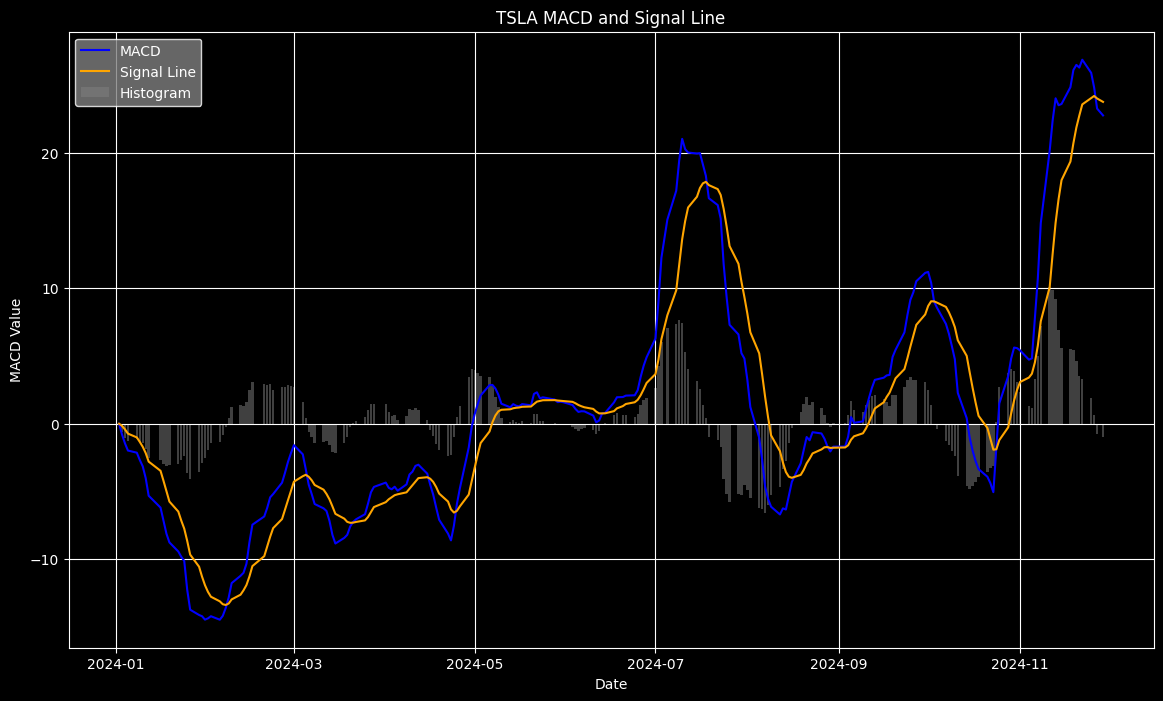

In [54]:
# Plot MACD, Signal Line, and Histogram
plt.figure(figsize=(14, 8))

# Plot MACD and Signal Line
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='orange')

# Plot the Histogram
plt.bar(df.index, df['MACD'] - df['Signal_Line'], label='Histogram', color='gray', alpha=0.5)

# Add title, labels, and legend
plt.title(f"{stock_symbol} MACD and Signal Line", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("MACD Value", color='white')
plt.legend(facecolor='gray', edgecolor='white', labelcolor='white')
plt.grid()

# Save the plot in 300dpi
plt.savefig(f"{stock_symbol}_MACD_Signal_Histogram.png", dpi=300)

# Show the plot
plt.show()


### Plot Buy and Sell Signals based on MACD crossover

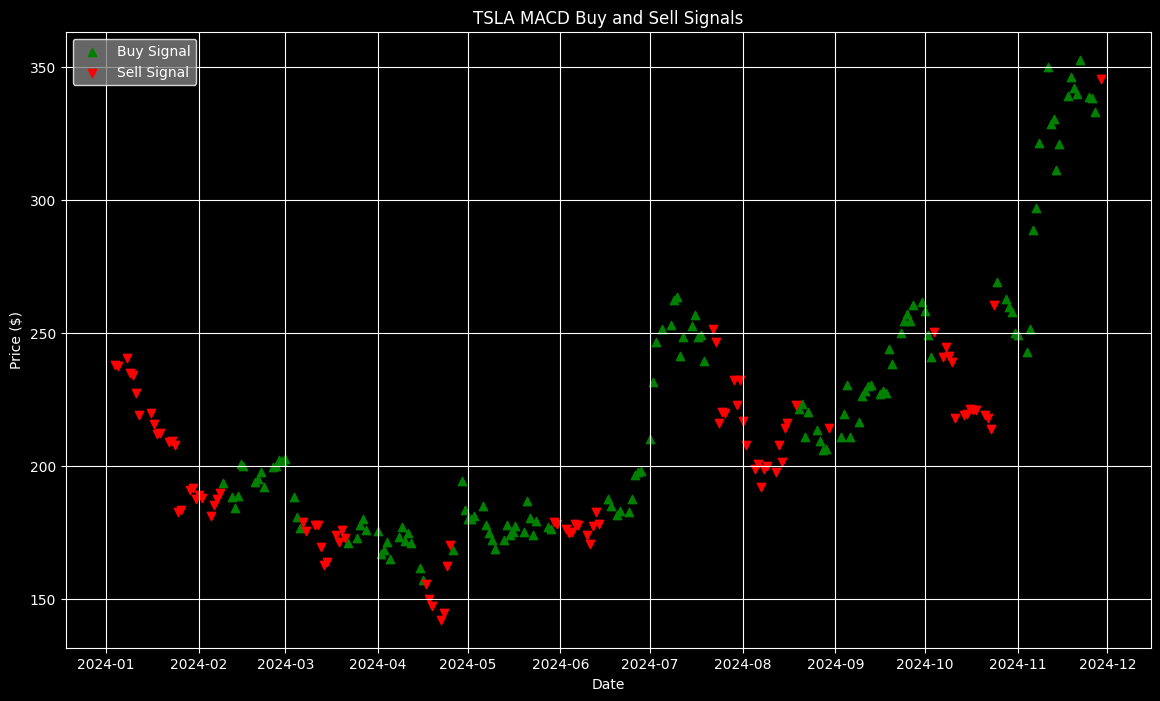

In [55]:
# Plot Buy and Sell Signals based on MACD crossover
plt.figure(figsize=(14, 8))

# Mark Buy and Sell Signals
plt.scatter(df[df['Position'] == 1].index, df[df['Position'] == 1]['Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(df[df['Position'] == -1].index, df[df['Position'] == -1]['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

# Add title, labels, and legend
plt.title(f"{stock_symbol} MACD Buy and Sell Signals", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Price ($)", color='white')
plt.legend(facecolor='gray', edgecolor='white', labelcolor='white')
plt.grid()

# Save the plot in 300dpi
plt.savefig(f"{stock_symbol}_MACD_Buy_Sell_Signals.png", dpi=300)

# Show the plot
plt.show()


### Calculate the Brokerage Fee
We define a function to calculate the brokerage fee for each transaction. The fee is set to 0.25% of the transaction amount, with a minimum fee of $0.01 to ensure that small transactions still incur a reasonable fee. This helps simulate the costs associated with trading, making the strategy more realistic.

In [43]:
# Define the fee calculation function
def calculate_fee(amount: float) -> float:
    """Calculate the brokerage fee based on transaction amount."""
    fee = amount * 0.0025  # 0.25% of the transaction
    return max(fee, 0.01)   # Minimum fee of $0.01

### Simulate Trading
In this cell, we simulate the trades by following the buy and sell signals generated by the MACD strategy. We track the portfolio value and record the buy/sell transactions in a list. After running the backtest loop, we print the transaction details, portfolio values, and final profit/loss.

In [44]:
# Initialize backtest parameters
initial_cash = 100
cash = initial_cash
shares = 0
transaction_details = []

# Backtest loop
for i in range(len(df)):
    # Buy signal: buy if `Position` changes to 1, no position held, and cash is available
    if df.iloc[i]['Signal'] == 1 and cash > 0:
        price = df['Close'].iloc[i]
        shares_to_buy = cash / price
        cost = shares_to_buy * price
        fee = calculate_fee(cost)
        total_cost = cost + fee

        if shares_to_buy > 0:
            cash -= total_cost
            shares += shares_to_buy
            transaction_details.append([df.index[i].date(), "BUY", round(price, 2), round(fee, 2), round(cash + shares * price, 2)])

    # Sell signal: sell if `Position` changes to -1, position held, and shares are available
    elif df.iloc[i]['Signal'] == -1 and shares > 0:
        price = df['Close'].iloc[i]
        sale_value = shares * price
        fee = calculate_fee(sale_value)
        net_sale = sale_value - fee

        cash += net_sale
        shares = 0  # Reset shares after selling
        transaction_details.append([df.index[i].date(), "SELL", round(price, 2), round(fee, 2), round(cash, 2)])

### Display Transaction Details and Final Portfolio Value
After the backtest loop, we display the transaction details and calculate the final portfolio value to assess the strategy’s performance. This includes showing the initial and final portfolio values, as well as the total profit or loss.

In [45]:
# Display transaction details
print(tabulate(transaction_details, headers=["Date", "Action", "Price ($)", "Fee ($)", "Portfolio Value ($)"], tablefmt="pretty"))

# Final portfolio value
final_value = cash + (shares * df['Close'].iloc[-1])
profit = final_value - initial_cash
print(f"\nInitial Portfolio Value: ${initial_cash:.2f}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")

+------------+--------+-----------+---------+---------------------+
|    Date    | Action | Price ($) | Fee ($) | Portfolio Value ($) |
+------------+--------+-----------+---------+---------------------+
| 2024-02-08 |  BUY   |  189.56   |  0.25   |        99.75        |
| 2024-03-06 |  SELL  |  176.54   |  0.23   |        92.65        |
| 2024-03-21 |  BUY   |  172.82   |  0.23   |        92.42        |
| 2024-04-16 |  SELL  |  157.11   |  0.21   |        83.78        |
| 2024-04-25 |  BUY   |  170.18   |  0.21   |        83.57        |
| 2024-05-29 |  SELL  |  176.19   |  0.22   |        86.32        |
| 2024-06-14 |  BUY   |  178.01   |  0.22   |        86.1         |
| 2024-07-19 |  SELL  |   239.2   |  0.29   |       115.48        |
| 2024-08-19 |  BUY   |  222.72   |  0.29   |       115.19        |
| 2024-08-29 |  SELL  |  206.28   |  0.27   |        106.4        |
| 2024-08-30 |  BUY   |  214.11   |  0.27   |       106.14        |
| 2024-10-03 |  SELL  |  240.66   |   0.3   |   

### Visualizing MACD and Trades
Finally, we visualize the MACD indicator and the executed trades on the price chart. This chart shows the buy and sell transactions from the backtest, giving a clear view of how the strategy would have performed on historical data.

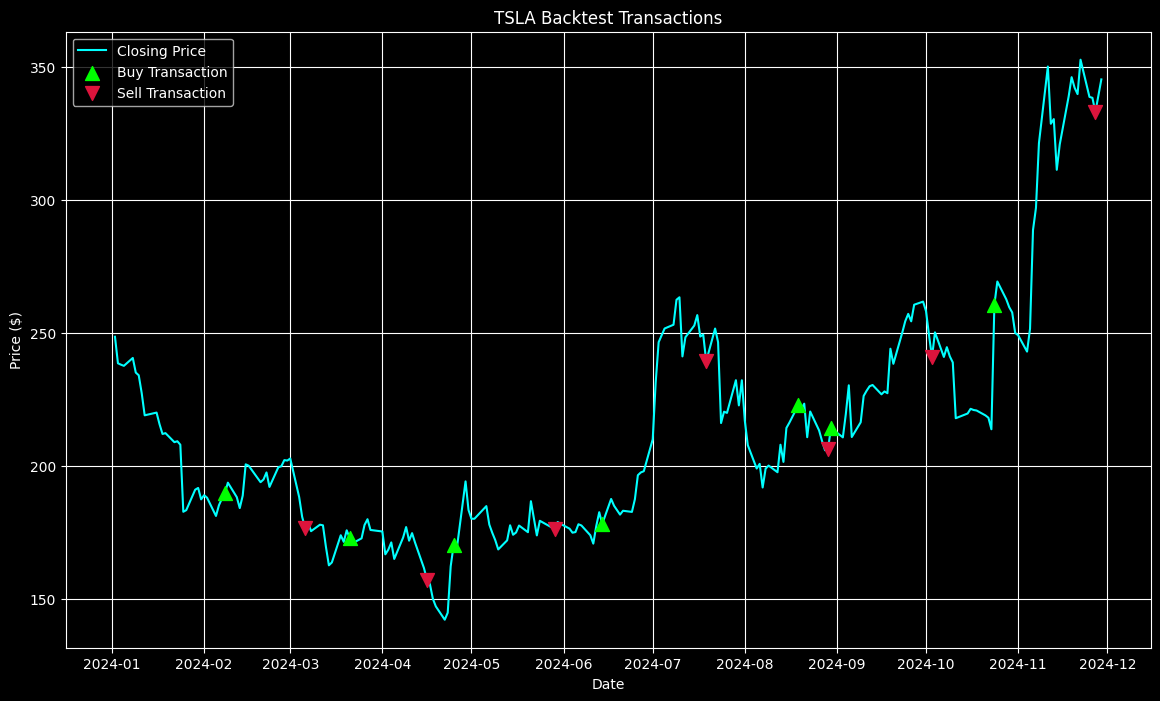

In [59]:
# Extract transaction dates and prices
buy_dates = [entry[0] for entry in transaction_details if entry[1] == "BUY"]
buy_prices = [df.loc[str(date), 'Close'] for date in buy_dates]

sell_dates = [entry[0] for entry in transaction_details if entry[1] == "SELL"]
sell_prices = [df.loc[str(date), 'Close'] for date in sell_dates]

# Plot trades on price chart
plt.figure(figsize=(14, 8))

# Plot the closing price
plt.plot(df.index, df['Close'], label='Closing Price', color='cyan')

# Highlight Buy and Sell Transactions
plt.scatter(buy_dates, buy_prices, label='Buy Transaction', marker='^', color='lime', s=100, zorder=5)
plt.scatter(sell_dates, sell_prices, label='Sell Transaction', marker='v', color='crimson', s=100, zorder=5)

# Add labels, legend, and title
plt.title(f"{stock_symbol} Backtest Transactions")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc='upper left')
plt.grid()

# Save the plot
plt.savefig(f"{stock_symbol}_Backtest_Transactions.png", dpi=300)

# Show the plot
plt.show()
